## Юнит 7. Основные алгоритмы машинного обучения. Часть II 
### Skillfactory: DSPR-19
### ML-7. Кластеризация

**Кластеризация** — это задача разбиения некого количества объектов на группы (кластеры), при этом объекты в группах должны иметь что-то общее и сильно отличаться от объектов в других кластерах. Перечень групп определяется в процессе работы алгоритма, а не заранее. Задача кластеризации является задачей обучения без учителя.

По сути, кластеризация очень похожа на задачу классификации, но без известных заранее классов. Алгоритм самостоятельно находит близкие по каким-то признакам точки и объединяет их в кластеры. Подобную операцию вы можете наблюдать, если будете искать какие-то часто встречающиеся объекты на карте.

### 7.2. Задачи и подходы кластеризации



Задача кластеризации: найти отображение множества входных объектов $X$, которое разделило бы множество $X$ на подгруппы. Кластеризация — это обучение без учителя.

Формальная запись задачи кластеризации выглядит следующим образом:

Пусть $X$ — множество объектов,  $Y$ — множество метод кластеров (идентификаторов их принадлежности). На множестве $X$ задана функция, которая вычисляет расстояние между объектами:

$\rho\left(x, x^{\prime}\right)$. 

Также дана конечная обучающая выборка объектов: $X^{m}=\left\{x_{1}, \ldots, x_{m}\right\} \subset X$ 

Нам надо разбить выборку на кластеры, то есть поставить каждому объекту $X$ в соответствие метку $y_{i} \in Y$ так, чтобы внутри каждого кластера объекты были как можно более близки (то есть расстояние должно быть минимальным), а объекты из разных кластеров значительно различались.

В задаче кластеризации входные данные задаются двумя способами:

- Признаковое описание объектов: все объекты описываются некоторыми характеристиками (значениями признаков)
- Матрица расстояний между объектами: для каждого объекта представлены расстояния от него до всех остальных
объектов выборки

**Некорректность задачи кластеризации** — решение задачи кластеризации принципиально неоднозначно:

- Нет **точной постановки** задачи кластеризации.
- Существует **множество критериев** качества кластеризации.
- Существует **множество методов** кластеризации.
- Часто заранее **неизвестно число кластеров**.
- Результат кластеризации зависит от **метрики**, которая **задаётся субъективно**.

**Разные цели кластеризации:**
- Упростить дальнейшую обработку данных: разбить множество объектов на несколько групп (кластеров), чтобы в дальнейшем работать с каждым кластером в отдельности
- Сократить объём хранимых данных: выделить кластеры и оставить по одному объекту от каждого кластера и таким образом сжать данные
- Выделить нетипичные объекты: выделить объекты, которые нельзя отнести ни к одному из кластеров
- Построить иерархию множества объектов: задача таксономии.  

**Разнообразие условий задач кластеризации.**


### Задание 7.2.1
Чем отличается кластеризация от классификации?  

Ответ:  
- ластеризация работает с неразмеченными данными, классификация — с размеченными верно

### Задание 7.2.2
Выберите, что из приведённого является целями кластеризации  

Ответ:  
- Выделить нетипичные объекты
- Сократить объём хранимых данных
- Построить иерархию множества объектов

Какие из перечисленных задач можно решить с помощью кластеризации?

Ответ:  
- сегментация покупаталей
- поиск схожих по характеристикам компаний

### 7.3. Условия задач кластеризации

**Форма кластеров**: внутрикластерные расстояния меньше межкластерных, ленточная структура, кластеры с центром, кластеры соединены перемычками, разреженный фон, пересекающиеся кластеры, кластеры отсутствуют, кластеры образуются не по близости расстояний.

**Вложенность кластеров** друг в друга.  
**Размер кластеров:** один кластер — одна тема, один кластер — одно большое событие, один кластер — одна новость.  
**Кластеризация как основная или вспомогательная задача.**  
**Жёсткая** _(определяем конкретный кластер для объекта)_ или **мягкая** _(определяем вероятность принадлежности объекта к кластеру)_ кластеризация.

### Задание 7.3.1
Выберите задачи, для которых кластеризация является основой:

Ответ:  
- Сегментация покупателей
- Кластеризация новостных текстов
- Кластеризация изображений

### Задание 7.3.2
С помощью какого типа кластеризации можно получить результат, что статья "Contour-Aware Multi-Label X-ray Organ Segmentation" относится к теме Deep Learning с вероятностью 0.7, к теме Medicine с вероятностью 0.3?

Ответ:  
- Мягкая

### 7.4. Алгоритмы кластеризации



Рассмотрим четыре основных алгоритма кластеризации:

_k-means_  
_EM-алгоритм_  
_DBSCAN_  
_агломеративная кластеризация_


### K-MEANS
**k-means** является одним из самых популярных и простых алгоритмов кластеризации. В ходе этого алгоритма все элементы пространства разбиваются на заранее известное (заданное) количество кластеров. Суть алгоритма состоит в том, что он пытается оптимизировать расстояние всех точек кластера от центра этого кластера. То есть он формирует кластеры так, чтобы внутри каждого сумма квадратов расстояний от точек до центра кластера была как можно меньше.

**Схема действия алгоритма k-means**

- Выбрать количество кластеров, которое нам кажется оптимальным для наших данных.
- Выбрать случайным образом в пространство наших данных центроиды.
- Для каждой точки набора данных посчитать, к какому центроиду она ближе.
- Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду. Каждый центроид на каждой итерации — вектор, элементы которого представляют собой средние значения признаков, вычисленные по всем записям кластера.
- Повторять шаги 3-4 фиксированное число раз или до тех пор, пока центроиды не сойдутся.

**У этого алгоритма есть ряд недостатков:**

- число кластеров надо знать заранее;
- алгоритм очень чувствителен к первичному выбору центроидов;
- не гарантирует достижение глобального минимума суммы квадратов расстояний, часто «застревает» в локальном минимуме.

**Mini-Batch K-means**  
Данная вариация _k-means_ используется в случае, если данных очень много. Из-за объема данных вычисление центров по всей выборке происходит долго. Решение проблемы: на каждом шаге k-means работать с небольшой подвыборкой данных. В общем случае упрощённый алгоритм должен сходиться к тому же результату, что и на полной выборке. Однако исследования показывают, что качество кластеров может ухудшаться по сравнению с классическим k-means.

**K-means++**  
Ещё одну вариацию алгоритма k-means мы используем в том случае, если у нас очень много признаков. Как известно, результат и время работы k-means зависит от изначального выбора центров. Чтобы минимизировать затраты, мы будем действовать следующим образом:

- Первый центр выбираем случайно из равномерного распределения на выборке.
- Каждый следующий центр выбираем случайно из оставшихся точек так, чтобы вероятность выбрать каждую точку была пропорциональна квадрату расстояния от неё до ближайшего центра.


### EM-АЛГОРИТМ

Следующий алгоритм кластеризации — **EM-алгоритм**. Последовательность действий в нём выглядит следующим образом:

**Схема действий EM-алгоритма**

- Выбрать количество кластеров, которое нам кажется оптимальным для наших данных.
- Выбрать случайным образом в пространство наших данных параметры распределений.
- Для каждой точки нашего набора данных посчитать вероятность принадлежности к каждому кластеру.
- Обновить параметры распределений таким образом, чтобы максимизировать вероятность принадлежности точек, отнесённых к кластеру.
- Повторять шаги 3-4 фиксированное число раз, либо до тех пор пока центроиды не сойдутся.

**Можно выделить следующие преимущества алгоритма:**

- Эффективная обработка больших объемов данных (Big Data).
- Мощная статистическая основа.
- Устойчивость к шумам и пропускам в данных.
- Возможность построения желаемого числа кластеров.
- Быстрая сходимость при удачной инициализации.

**Недостатки алгоритма следующие:**

- При неудачной инициализации сходимость алгоритма может оказаться медленной.
- Предположение о нормальности всех измерений данных не всегда выполняется.
- Алгоритм иногда останавливается в локальном минимуме и не достигает глобального.

### АГЛОМЕРАТИВНАЯ КЛАСТЕРИЗАЦИЯ
Иерархическая кластеризация делится на две стратегии: **агломеративная** — снизу-вверх, объединяем точки в кластеры и **дивизионная** — сверху-вниз, разделяем один большой кластер на малые.

- Назначаем каждой точке свой кластер.
- Сортируем попарные расстояния между центрами кластеров по возрастанию.
- Берём пару ближайших кластеров, склеиваем их в один и пересчитываем центр кластера.
- Повторяем шаги 2-3 до тех пор, пока все данные не склеятся в один кластер.

### DBSCAN
Расшифровывается как **Dense-based spatial clustering of applications with noise**. Это основанная на плотности пространственная кластеризация для приложений с шумами.

**Схема действия DBSCAN**

- Случайно выбираем точку, которую не посещали. Окрестность точки извлекается с использованием расстояния .
- Если в этой окрестности точек ≥ minPoints, тогда точка становится первой точкой в новом кластере. Иначе — помечаем точку как шум, она становится посещённой.
- Точки из окрестности становятся частью кластера. Для каждой из них изучаем окрестность: если точек в окрестности < minPoints, то помечаем точку как граничную.
- Повторяем пункты 2 и 3, пока не определим все точки в кластере.
- Повторяем пункты 1–4, пока все точки не станут просмотренными.

**Главная идея:**  

- Основные точки.
- Граничные точки.
- Шумовые точки.


**Достоинства алгоритма:**

- не требуется число кластеров;
- определяем кластеры произвольной формы;
- определяет шум, устойчив к выбросам.


**Недостатки алгоритма:**

- не может выделять кластеры, имеющие разную плотность;
- результат зависит от используемой функции расстояния.

### Задание 7.4.1
Может ли во время выполнения K-means возникнуть ситуация, когда назначение кластеров объектам выборки не меняется между последовательными итерациями?

Ответ:  
- да

### Задание 7.4.2
Какие из условий могут стать причиной прекращения выполнения K-means:

1. Алгоритм выполняется фиксированное число итераций

2. Назначение кластеров объектам выборки не меняется между последовательными итерациями  

Ответ:  
- Оба

### Задание 7.4.3
Ниже представлена дендрограмма, полученная на основе выполнения агломеративной кластеризации. На сколько кластеров разобъётся набор данных, если провести линию на уровне значения 2 по оси y?  

Ответ:  
- 2

### Задание 7.4.4
Какой из приведённых алгоритмов может использоваться для мягкой кластеризации?

Ответ:  
- EM-алгоритм 

### Задание 7.4.5
Какие параметры нужны при инициализации алгоритма DBSCAN:
Ответ:  
- Размер окрестности вокруг точки
-Минимальное число точек, которые должны попасть в окрестность точки

Какая вариация алгоритма k-means используется, если у нас большое количество признаков?
Ответ:  
- k-means ++ 

Для каких алгоритмов кластеризации изначально необходимо задать количество кластеров?
Ответ:  
- k-means
- EM-алгоритм

Предположим, вам необходимо провести кластеризацию на 7 точках. В ходе первой итерации точки расположились по кластерам следующим образом: С1: {(2,2), (4,4), (6,6)} C2: {(0,4), (4,0)} C3: {(5,5), (9,9)} Какие координаты у центроидов будут на второй итерации?
Ответ:  
- C1: (4,4), C2: (2,2), C3: (7,7) 


### 7.5. K-means. Практика


In [1]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams['figure.figsize'] = 12, 8

In [3]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

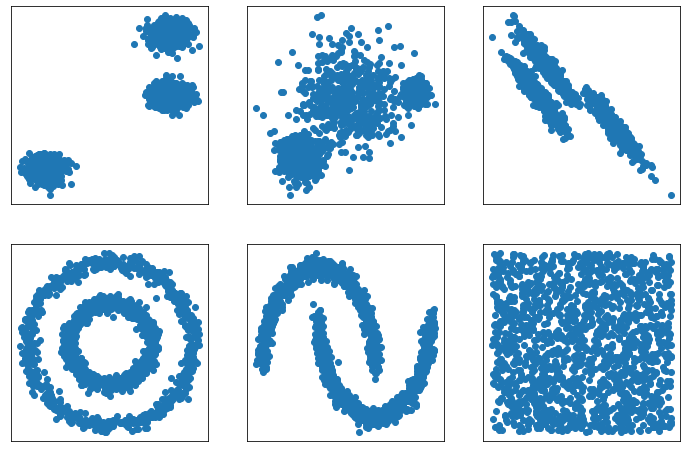

In [4]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

### KMeans

Интерактивная визуализация работы KMeans – https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Для примера из видео: **Random** $\rightarrow$ **Packed Circles**

![KMeans](https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif "KMeans")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [5]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

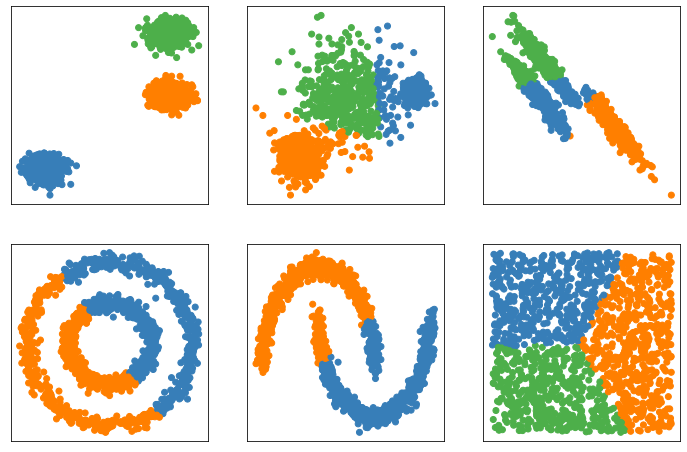

In [6]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

### Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

In [7]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:


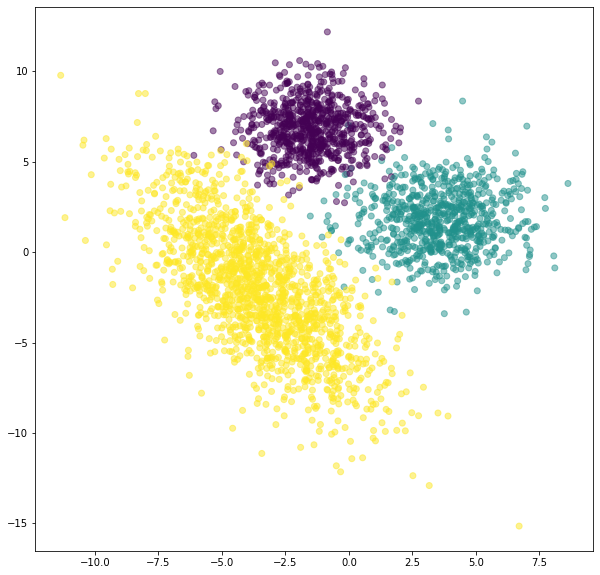

In [8]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [9]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
# pd.Series(counts,index=unique)

{0: 750, 1: 750, 2: 1500}

В дальнейшем в задачах с использованием этого датасета при использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет кластеризацию датасета с помощью алгоритма K-means, инициализруется так:

In [10]:
from sklearn.cluster import KMeans
k_means = KMeans()

При создании объекта можно указать следующие параметры:

- n_clusters — число кластеров, на которое алгоритм будет делить набор данных;
- init — способ начальной инициализации центроидов кластров;
- random_state — фиксирует генерацию случайного числа для инициализации центроидов.

Полный список параметров доступен в https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html - 

### Задание 7.5.2
Для обучения модели K-means необходимо вызвать метод fit, передав входным параметром признаки объектов датасета:
```python
k_means.fit(X)
```
Обучив, мы можем получить центроиды кластеров:
```python
k_means.cluster_centers_
```
И узнать, в какой кластер попал каждый из объектов:
```python
k_means.labels_
```
Обучите модель K-means с параметрами n_clusters=3 и random_state=42 на признаках исходного датасета.   

Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:
```python
import numpy as np
a = [0.4, 0.6, 1.7]
print(np.round(a).astype(np.int))

# Вывод
[0 1 2]
```
`astype(np.int)` конвертирует элементы массива в целые числа.

Подсказка: В ответ скопируйте и вставьте вывод кода. Пример ввода: [[X Y] [A B] [C D]]. Числа должны быть целые, без десятичных знаков и точек.

In [11]:
k_means = KMeans(n_clusters=3,random_state=42)
k_means.fit(X)

KMeans(n_clusters=3, random_state=42)

In [12]:
print(np.round(k_means.cluster_centers_).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


### Задание 7.5.3
Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2. Записывайте строго в таком порядке.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром `return_counts=True`:
```python
import numpyas np
a = [0, 0, 0, 1, 1, 2]
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')
# Вывод
3 2 1
```
Для визуализации получившегося датасета можно использовать следующий код:
```python
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()
```

In [13]:
_, counts = np.unique(k_means.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1321 938 741 

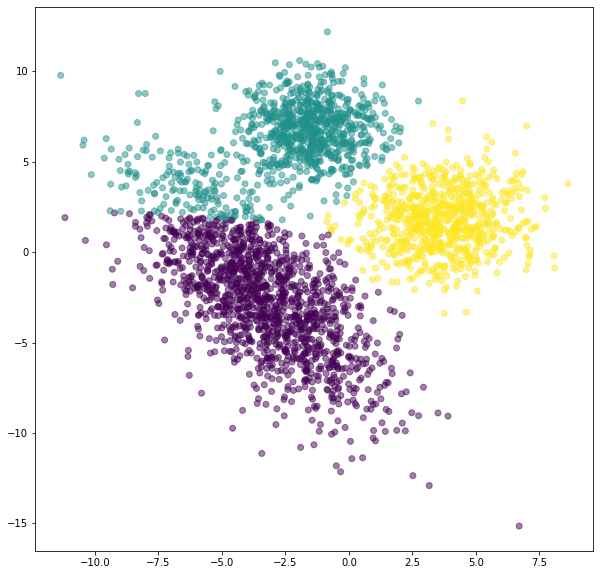

In [14]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

### ЗАДАЧА НА РЕАЛЬНЫХ ДАННЫХ: КЛАСТЕРИЗАЦИЯ УЧЕНИКОВ СТАРШЕЙ ШКОЛЫ

В датасете для учеников предоставлены следующие признаки:

- Год выпуска
- Пол
- Возраст
- Количество друзей
- 36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи)

Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.

Нормализуйте оставшиеся признаки с помощью StandardScaler(). Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.

Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, random_state =123.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('snsdata.csv')

X_sc = df.drop(columns=['gradyear','gender','age','friends'])

In [17]:
X_sc.head(10)

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_sc)

In [19]:
k_means_sc = KMeans(n_clusters=9, random_state=123)

In [20]:
k_means_sc.fit(X_sc)

KMeans(n_clusters=9, random_state=123)

### Задание 7.5.4
Укажите номер кластера, в который попало меньше всего учеников.

In [21]:
unique, counts = np.unique(k_means_sc.labels_,return_counts=True)

clasters_count = pd.Series(counts,index=unique)
clasters_count.idxmin()

3

In [22]:
clasters_count

0    20345
1      424
2      830
3        1
4     1026
5      932
6      644
7     5034
8      764
dtype: int64

В один из кластеров попали ученики с интересами ***music, god, dance, hair, shopping, cute, band, rock, football, church***. Сколько всего учеников попали в этот кластер?

In [23]:
features = df.drop(columns=['gradyear','gender','age','friends']).columns

In [24]:
x_feat = ['music', 'god', 'dance', 'hair', 'shopping', 'cute', 'band', 'rock', 'football', 'church']

In [25]:
x = [[int(f in x_feat) for f in features]]

In [26]:
x_claster = k_means_sc.predict(x)

In [27]:
clasters_count[x_claster]

7    5034
dtype: int64

### 7.6. EM-алгоритм. Практика

**Пример работы EM-алгоритма:**

- выбираем число кластеров, которое нам кажется оптимальным, в нашем случае их два;
- выбираем параметр распределений;
- для каждой точки набора считаем вероятность принадлежности каждому распределению;
- пересчитываем параметры распределения;
- повторяем шаги: снова присваиваем точку распределению и считаем параметры.

Рассмотрим реализацию алгоритмы в библиотеке Sklearn. Наш алгоритм лежит в пакете GaussianMixture. При инициализации мы можем указать число компонентов, максимальное число итераций и способ инициализации начальных параметров.



![EM-алгоритм](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif "EM-алгоритм")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [28]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

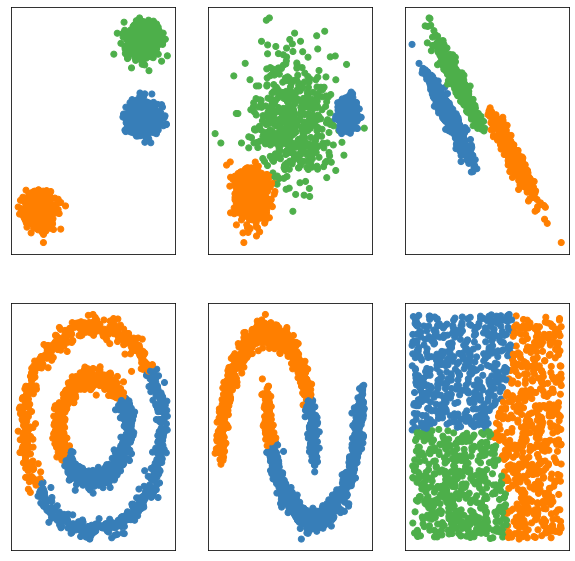

In [29]:
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters'])
    
    em_gm.fit(X)
    y_pred = em_gm.predict(X)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

Объект, который выполняет кластеризацию датасета с помощью EM-алгоритма, инициализируется так:
```python
from sklearn.mixture import GaussianMixture

gm = GaussianMixture()
```
В отличие от остальных рассматриваемых алгоритмов, ***EM-алгоритм*** лежит не в модуле `cluster`, а в модуле `mixture`. ***EM-алгоритм*** определяет смеси распределений в выборке, а не просто проводит кластеризацию.

Для обучения модели GaussianMixture необходимо вызвать метод ```fit```, передав входным параметром признаки объектов датасета:
```python
gm.fit(X)
```
Получить предсказания можно с помощью метода predict после метода `fit`:
```python
gm.fit(X)
y_pred = gm.predict(X)
```
Можно совместить эти два шага при помощи метода `fit_predict`:
```python
y_pred = gm.fit_predict(X)
```
Обучив, мы можем получить параметры распределений кластеров, например, средние:
```python
means = gm.means_
```

### Для решения задач будем использовать датасет, который мы создавали в теме «K-means. Практика»:

In [30]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:



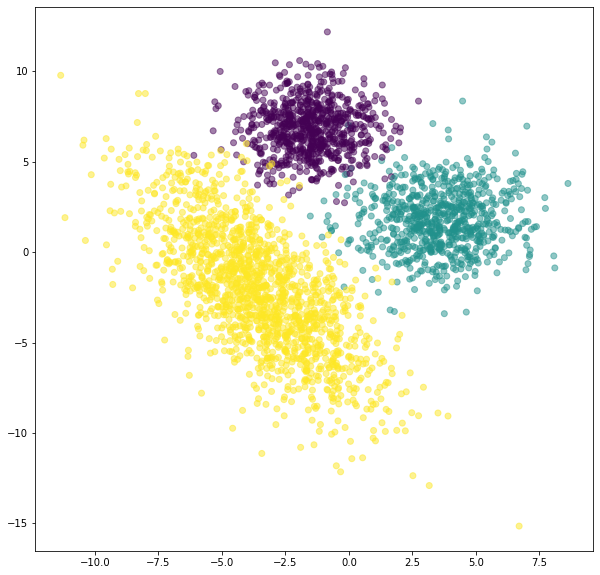

In [31]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:



In [32]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

При использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет кластеризацию датасета с помощью EM-алгоритма, инициализируется так:



In [33]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture()

### Задание 7.6.2
Обучите модель `GaussianMixture` с параметрами `n_components=3` и `random_state=42` на признаках исходного датасета.

Какие средние значения будут у получившихся распределений кластеров? Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:
```python
import numpy as np
a = [0.4, 0.6, 1.7]
print(np.round(a).astype(np.int))

[0 1 2]
```  
`astype(np.int)` конвертирует элементы массива в целые числа.

В ответ скопируйте и вставьте вывод кода. 
Пример ввода: `[[X Y] [A B] [C D]]`

In [34]:
from sklearn.mixture import GaussianMixture

In [35]:
gm = GaussianMixture(n_components=3, random_state=42)

gm.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [36]:
print(np.round(gm.means_).astype(np.int))

[[-2 -4]
 [ 1  4]
 [-5  0]]


### Задание 7.6.3
Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2. Числа вводите целые, без точек и запятых.

Для подсчёта элементов в списке можно воспользоваться функцией `numpy.unique` с параметром `return_counts=True`

In [37]:
_, counts = np.unique(gm.predict(X),return_counts=True)
for cnt in counts: print (cnt, end=' ')

788 1510 702 

### Задание 7.6.4
Возьмите данные про учеников старшей школы из прошлого урока (c такой же обработкой) и примените к ним ***EM-алгоритм*** , количество кластеров — `9`, `random_state = 123`. К какому кластеру принадлежит восьмой (по списку из изначального датасета) ученик? Введите номер кластера целым числом без точек и десятичной части.

In [38]:
gm_sc = GaussianMixture(n_components=9, random_state=123)
gm_sc.fit(X_sc)

gm_sc.predict(X_sc[7:8])

array([3])

Сколько итераций до схождения осуществил алгоритм? Вопрос относится к датасету об учениках старшей школы.

In [39]:
gm_sc.n_iter_

30

### 7.7. Агломеративная кластеризация. Практика
При инициализации можно задать количество кластеров, функцию расстояния, способ определения ближайшего соседа:

![AG](https://media.giphy.com/media/pSNCWCEAsgrAs/giphy.gif "Агломеративная кластеризация")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Будем поочередно объединять близлежащие объекты (кластеры), пока весь датасет не войдёт в кластеры. Посмотрим, как реализуется агломеративная кластеризация в пакете Sklearn. При инициализации можно задать количество кластеров, функцию расстояния, способ определения ближайшего соседа:

In [40]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                                   # “cosine”, or “precomputed”
                             linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

Мы используем здесь матрицу смежности по той причине,что агломеративная кластеризация строится в качестве одного из вариантов именно по такой матрице, которая показывает, сколько ближайших соседей находится рядом с объектом.

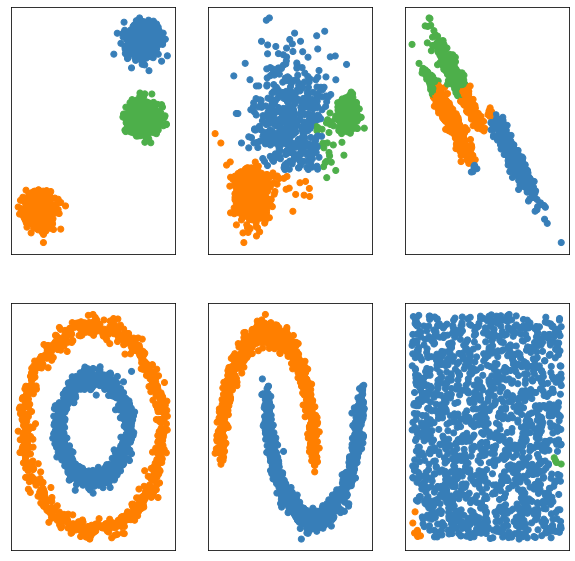

In [41]:
import warnings

from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

### Для решения задач будем использовать датасет, который мы создавали в теме «K-means. Практика»:

In [42]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:



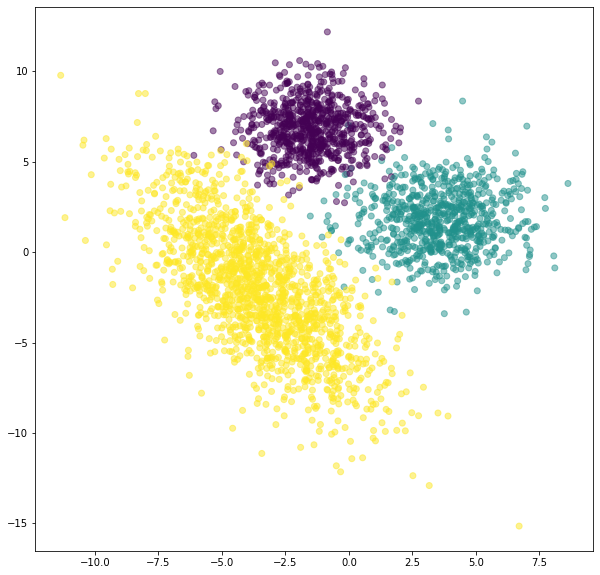

In [43]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Объект, который выполняет агломеративную кластеризацию датасета, инициализируется следующим образом:

```python
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering()
```
В отличие от `k-means`, `AgglomerativeClustering` не имеет параметра `random_state`.

Обучение модели `AgglomerativeClustering` проходит аналогично обучению модели `k-means`:
```python
ac.fit(X)
```
Обучив, мы можем узнать, в какой кластер попал каждый из объектов:
```python
ac.labels_
```

### Задание 7.7.1
Обучите модель `AgglomerativeClustering` с параметром `n_clusters=3` на признаках исходного датасета. Напишите число листьев в иерархическом дереве, полученном при обучении:

In [44]:
ac_sc = AgglomerativeClustering(n_clusters=3)

ac_sc.fit(X)

AgglomerativeClustering(n_clusters=3)

In [45]:
ac_sc.n_leaves_

3000

При каком значении параметра linkage при создании объекта AgglomerativeClustering критерием объединения кластеров будет среднее расстояние между объектами объединяемых кластеров?

Ответ: average

### Задание 7.7.2
Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

Для подсчёта элементов в списке можно воспользоваться функцией `numpy.unique` с параметром `return_counts=True`:

In [46]:
np.unique(ac_sc.labels_,return_counts=True)

(array([0, 1, 2]), array([1112, 1142,  746]))

### Задание 7.7.3
При создании модели `AgglomerativeClustering` можно указать матрицу смежности, передав её в параметр `connectivity`. Построить матрицу смежности можно с помощью следующего кода:
```python
fromsklearn.neighborsimport kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)
```
В переменной `connectivity` будет хранится матрица смежности для ненаправленного графа на основе датасета.

Обучите модель `AgglomerativeClustering` с параметром `n_clusters=3` и составленной матрицей смежности на признаках исходного датасета.

Посчитайте матрицу смежности, используя приведённый код. Подставьте получившееся значение в параметр `connectivity` при создании объекта `AgglomerativeClustering`. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

In [47]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [48]:
ac_sc_conmatr = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)

In [49]:
ac_sc_conmatr.fit(X)

AgglomerativeClustering(connectivity=<3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 21754 stored elements in Compressed Sparse Row format>,
                        n_clusters=3)

In [50]:
np.unique(ac_sc_conmatr.labels_,return_counts=True)

(array([0, 1, 2]), array([1486,  746,  768]))

### Задание 7.7.4
Постройте дендрограмму с помощью пакета scipy:

```python
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
dendrogram(Z, leaf_rotation=90.)
```
На выходе должно получиться изображение иерархического дерева.

Постройте дендрограмму на исходном наборе данных. Сколько получится кластеров, если граничным расстоянием для разделения кластеров взять 150.

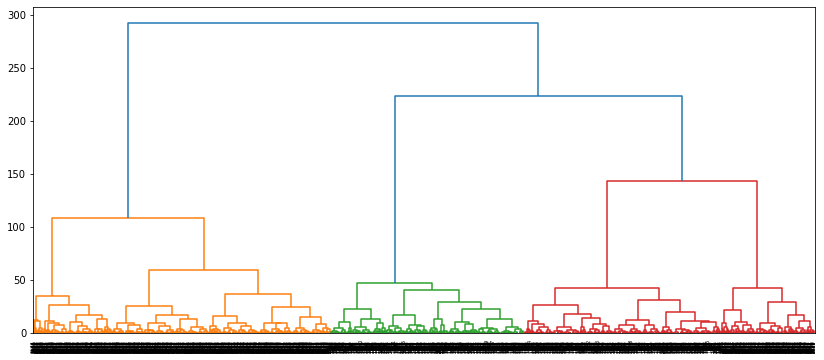

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
plt.figure(figsize=(14,6))
dendrogram(Z, leaf_rotation=90.);

In [52]:
ac_sc_thres = AgglomerativeClustering(n_clusters=None, compute_full_tree=True,distance_threshold=150)
ac_sc_thres.fit(X)

AgglomerativeClustering(compute_full_tree=True, distance_threshold=150,
                        n_clusters=None)

In [53]:
ac_sc_thres.n_clusters_

3

### Задание 7.7.5
Сколько кластеров получится, если граничным расстоянием для разделения кластеров взять 100?

In [54]:
ac_sc_thres = AgglomerativeClustering(n_clusters=None, compute_full_tree=True,distance_threshold=100)
ac_sc_thres.fit(X)

AgglomerativeClustering(compute_full_tree=True, distance_threshold=100,
                        n_clusters=None)

In [55]:
ac_sc_thres.n_clusters_

5

### Рассмотрим данные, содержащие информацию о составе различных продуктов.

In [65]:
df = pd.read_csv('food.csv',sep=' ')

In [66]:
df.head(3)

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0


### 7.8. DBSCAN. Практика


Интерактивная визуализация работы DBSCAN – https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Для примера из видео: **Pimpled Smiley**

![DBSCAN](https://media0.giphy.com/media/lCL2GQewp7fkk/giphy.gif "DBSCAN")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Из набора данных случайным образом выбираем точку и смотрим её окрестности. Если там не менее четырёх точек, то мы помечаем скопление кластером и далее для каждой точки из окрестности рассматриваем такое же окружение. Повторяем до момента окончания точек в наборе.

Посмотрим, как реализуется алгоритм DBSCAN в пакете Sklearn. При инициализации можно задать размер окрестностей eps и минимальное число точек в этой окрестности min_sample:



In [68]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,
                min_samples=5)


In [69]:
from scipy.cluster.hierarchy import fcluster

t = 2.3
labels = fcluster(Z, t, criterion='distance')

Посмотрим, как DBSCAN будет работать с нашими наборами данных. Мы будем варьировать только размер окрестностей:



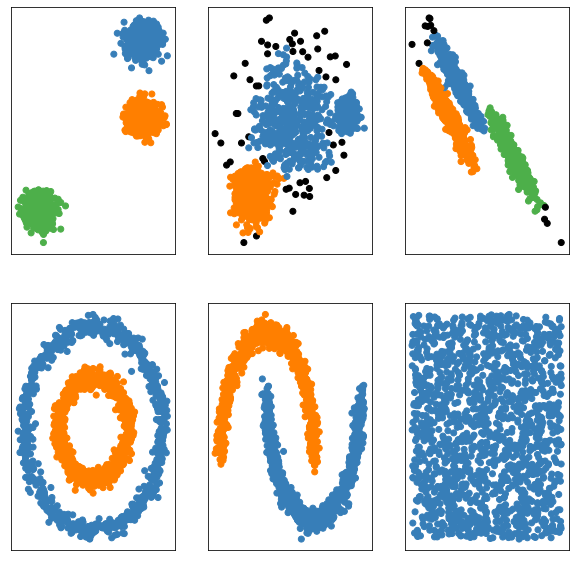

In [70]:
datasets_params_list = [
    (blobs, {'eps': 0.3}),
    (varied, {'eps': 0.18}),
    (aniso, {'eps': 0.184}),
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (no_structure, {'eps': 0.3})]

for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    dbscan = DBSCAN(eps=dbscan_params['eps'])
    
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

### Для решения задач будем использовать датасет, который мы создавали в теме «K-means. Практика»:

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:



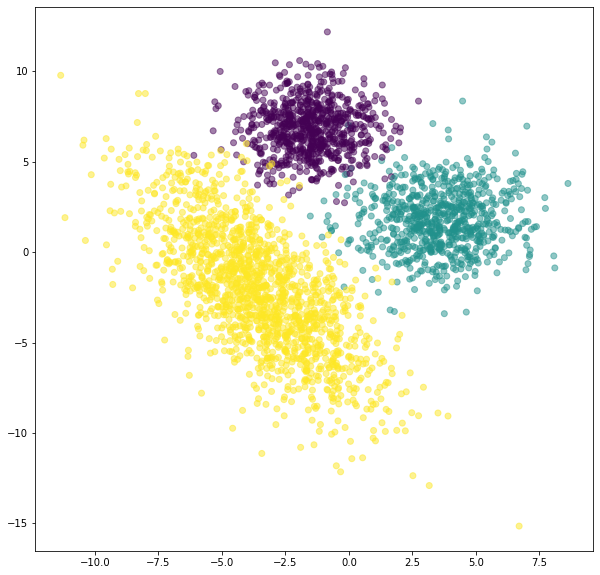

In [72]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Объект, который выполняет кластеризацию датасета с помощью алгоритма DBSCAN, инициализируется так:
```python
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
```
В отличие от `k-means` и `AgglomerativeClustering`, класс `DBSCAN` не имеет параметра `n_clusters`, поскольку `DBSCAN` автоматически определяет число кластеров в выборке.

Полный список параметров доступен в документации (англ.).

Обучение модели `DBSCAN` проходит аналогично обучению модели k-means:
```python
dbscan.fit(X)
```
Обучив, мы можем узнать, в какой кластер попал каждый из объектов:
```python
dbscan.labels_
```

### Задание 7.8.1
Какой параметр DBSCAN устанавливает число объектов в окрестности, которое определяет, является ли объект основным или нет?

Ответ: min_samples

### Задание 7.8.2
Обучите модель DBSCAN с параметрами `eps=0.9` и `min_samples=35` на признаках объектов исходного датасета. Выведите число получившихся кластеров.

Обратите внимание, что `DBSCAN` определяет выбросы, относя их к кластеру -1. Кластер выбросов учитывать в ответе не нужно.

In [73]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=35)

In [74]:
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=35)

In [75]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2])

### Задание 7.8.3
Сколько объектов выборки было отмечено как выбросы в прошлой задаче?

In [76]:
np.unique(dbscan.labels_,return_counts=True)

(array([-1,  0,  1,  2]), array([ 368,  656,  721, 1255]))

### Задание 7.8.4
Проверьте, как настройка параметров влияет на результат работы `DBSCAN`. Обучите модель `DBSCAN` с параметрами `eps=0.8` и `min_samples=35` на признаках объектов исходного датасета.

Выведите число объектов выборки, которые были отмечены как выбросы.

In [77]:
dbscan_2 = DBSCAN(eps=0.8, min_samples=35)

dbscan_2.fit(X)

np.unique(dbscan_2.labels_,return_counts=True)

(array([-1,  0,  1,  2]), array([ 583,  603,  681, 1133]))

### 7.9. Сравнение алгоритмов


### Задание 7.9.1
Какие из приведённых алгоритмов лучше всего выполняют кластеризацию невыпуклых кластеров?

Ответ:  
- Агломеративная кластеризация
- DBSCAN

### Задание 7.9.2
Какой из приведённых алгоритмов лучше масштабируется для большого числа объектов в обучающей выборке?

Ответ:  
- Mini-Batch K-means 

### 7.10. Оценка качества
